In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pyscreenshot as ImageGrab
import PIL
from PIL import Image, ImageDraw
import cv2

In [2]:
loaded_mnist = loadmat("mnist-original.mat")

In [3]:
mnist = {
    "data" : loaded_mnist['data'].T,
    "target" : loaded_mnist['label'][0]
}

In [4]:
x = mnist['data']
y = mnist['target']

In [5]:
def displayNumber(target):
    number = x_test[target]
    number_img = number.reshape(28,28)
    
    plt.imshow(
        number_img,
        cmap = plt.cm.binary,
        interpolation = 'nearest'
    )
    plt.show()
    
    return f'The number is {int(y_test[target])}'

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
model.score(x_train,y_train)

0.9355102040816327

In [10]:
prediction = model.predict(x_test)
prediction[:10]

array([1., 5., 8., 1., 4., 7., 7., 1., 8., 2.])

In [11]:
y_test[:10]

array([1., 8., 8., 1., 4., 7., 7., 9., 8., 2.])

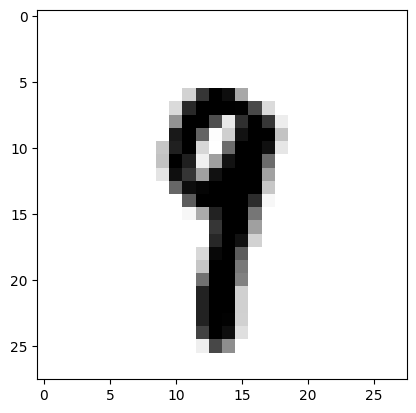

'The number is 9'

In [12]:
displayNumber(7)

In [13]:
import pickle

pickle.dump(model, open("data/mnist_model.pkl", "wb"))

In [14]:
loaded = pickle.load(open("data/mnist_model.pkl", "rb"))
loaded.predict(x_test)

array([1., 5., 8., ..., 4., 6., 6.])

In [15]:
from tkinter import *

In [16]:
cw = 300
ch = 300
center = ch//2
white = (255,255,255)
green = (0,128,0)

def saveImg():
    img.save("image.png")
    loaded_img = cv2.imread("image.png")
    loaded_img = cv2.cvtColor(loaded_img, cv2.COLOR_BGR2GRAY)

    ret, img_th = cv2.threshold(loaded_img,100,255,cv2.THRESH_BINARY)

    roi = cv2.resize(loaded_img, (28,28), interpolation = cv2.INTER_AREA)

    rows, cols = roi.shape

    X=[]

    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>250:
                k=0
            X.append(k)
    
    pred = loaded.predict([X])
    print(f'Prediction is {int(pred[0])}')
    
def delete_lines():
    c.delete('all')
    c.pack_forget()
    c.pack()

def paint(event):
    color = 'black'
    x1,y1 = (event.x-1), (event.y-1)
    x2,y2 = (event.x+1), (event.y+1)
    c.create_oval(x1,y1,x2,y2,fill=color,outline=color, width = 10)
    draw.line([x1,y1,x2,y2], fill=color, width = 10)


In [17]:
root = Tk()
root.title('Draw Number')

c = Canvas(root, width=cw, height=ch,bg="white")
c.pack()

img = PIL.Image.new("RGB", (cw, ch), white)
draw = ImageDraw.Draw(img)

c.pack(expand=YES,fill=BOTH)
c.bind('<B1-Motion>',paint)

button = Button(text="Predict",command = saveImg)
button.place(relheight = 0.1, relwidth = 0.2, relx = 0.4, rely = 0.85, anchor = CENTER)

button2 = Button(text="Clear",command = delete_lines)
button2.place(relheight = 0.1, relwidth = 0.2, relx = 0.6, rely = 0.85, anchor = CENTER)

root.mainloop()

Prediction is 7
